<a href="https://colab.research.google.com/github/sujarins/project/blob/main/model_trainging_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install emnist

In [2]:
#eminst dataset (pypi) (https://pypi.org/project/emnist/)
from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples

#visualize tools
import cv2
import matplotlib.pyplot as plt

#basic tools
import pandas as pd
import numpy as np

#tensorflow
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**<font size=5>Import dataset and split into training dataset and testing dataset**

In [3]:
#import emnist dataset from pypi
print('list_dataset: ',list_datasets())

#extract training and testing
X_train, y_train = extract_training_samples('letters')
X_test, y_test = extract_test_samples('letters')

#re-check shape
print('training_shape: ', X_train.shape)
print('training_label_shape: ', y_train.shape)
print('test_shape: ', X_test.shape)
print('test_label_shape: ', y_test.shape)

list_dataset:  ['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']
training_shape:  (124800, 28, 28)
training_label_shape:  (124800,)
test_shape:  (20800, 28, 28)
test_label_shape:  (20800,)


**<font size=5>Defines all function here**

In [4]:
#preparing function for preprocessing and visualize samples
def sharpen_filter(image):
    #sharpen an image (got from https://stackoverflow.com/questions/4993082/how-can-i-sharpen-an-image-in-opencv)
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

def visualize_after_filter(rows, cols, cmaps, image):
    row = rows
    col = cols
    num_pic = row*col
    fig = plt.figure(figsize=(8,4))
    for j in range(num_pic):
        plt.subplot(row, col, j+1)
        #plt.imshow(image[col+j], cmap=cmaps)
        plt.imshow(image[j], cmap=cmaps)
        #plt.title(labels[col+j])
        #plt.title(labels[j])
        plt.axis('off') #ถ้าอยากเอา scale ภาพออกให้ set off
    plt.show()


def visualize_all(row, col, cmap, viz_list, viz_name):

    for i in range(len(viz_name)):
        #training
        print('-'*25,viz_name[i],'-'*25)
        visualize_after_filter(rows=row,
                               cols=col,
                               cmaps=cmap,
                               image=viz_list[i])
        print(str(viz_name[i]),'.shape: ',np.array(viz_list[i]).shape,'\n')




**<font size=5>Filter and Resize dataset**

In [5]:
#training
#train_thres_deck = []
train_sharp_deck = []
training_labels = []

train_inter_area = []
train_cubic = []
train_nearest = []
train_linear = []
for i in range(len(X_train)):
    img_sharp = sharpen_filter(X_train[i])

    #interpolation
    pic_inter_area_train = cv2.resize(img_sharp, (64,64), interpolation=cv2.INTER_AREA)
    pic_cubic_train = cv2.resize(img_sharp, (64,64), interpolation=cv2.INTER_CUBIC)
    pic_nearest_train = cv2.resize(img_sharp, (64,64), interpolation=cv2.INTER_NEAREST)
    pic_linear_train = cv2.resize(img_sharp, (64,64), interpolation=cv2.INTER_LINEAR)

    #append
    #train_thres_deck.append(img_sharp)
    train_sharp_deck.append(img_sharp)
    training_labels.append(y_train[i])

    train_inter_area.append(pic_inter_area_train)
    train_cubic.append(pic_cubic_train)
    train_nearest.append(pic_nearest_train)
    train_linear.append(pic_linear_train)

#testing
#test_thres_deck = []
test_sharp_deck = []
test_labels = []

test_inter_area = []
test_cubic = []
test_nearest = []
test_linear = []
for i in range(len(X_test)):
    img_sharp_test = sharpen_filter(X_test[i])

    #interpolation
    pic_inter_area_test = cv2.resize(img_sharp_test, (64,64), interpolation=cv2.INTER_AREA)
    pic_cubic_test = cv2.resize(img_sharp_test, (64,64), interpolation=cv2.INTER_CUBIC)
    pic_nearest_test = cv2.resize(img_sharp_test, (64,64), interpolation=cv2.INTER_NEAREST)
    pic_linear_test = cv2.resize(img_sharp_test, (64,64), interpolation=cv2.INTER_LINEAR)

    #append
    #test_thres_deck.append(thres_test)
    test_sharp_deck.append(img_sharp_test)
    test_labels.append(y_test[i])

    test_inter_area.append(pic_inter_area_test)
    test_cubic.append(pic_cubic_test)
    test_nearest.append(pic_nearest_test)
    test_linear.append(pic_linear_test)

print('number of training',len(train_sharp_deck))
print('number of training_labels',len(training_labels))

print('*'*40)
print('number of test',len(test_sharp_deck))
print('number of test_labels',len(test_labels))

number of training 124800
number of training_labels 124800
****************************************
number of test 20800
number of test_labels 20800


**<font size=5>Visualize picture after filtering (training dataset)**

input cols(number1-10):5
which cmap??: binary
------------------------- train_orinal -------------------------


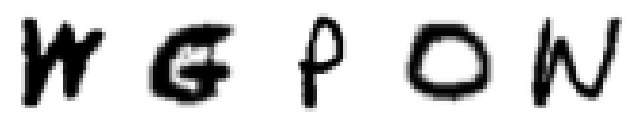

train_orinal .shape:  (124800, 28, 28) 

------------------------- train_sharp -------------------------


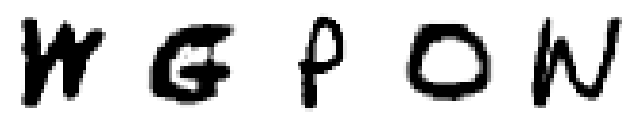

train_sharp .shape:  (124800, 28, 28) 

------------------------- train_resize_inter_area -------------------------


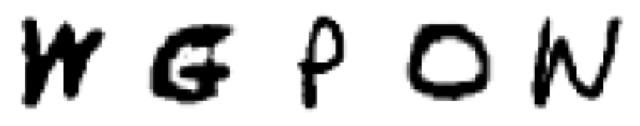

train_resize_inter_area .shape:  (124800, 64, 64) 

------------------------- train_resize_cubic -------------------------


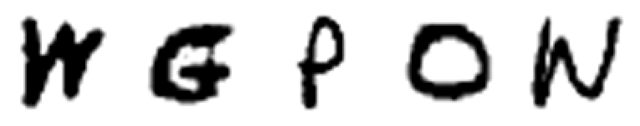

train_resize_cubic .shape:  (124800, 64, 64) 

------------------------- train_resize_nearest -------------------------


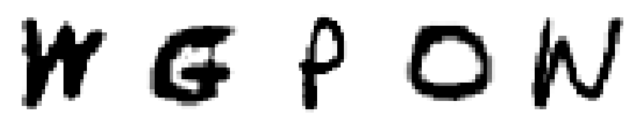

train_resize_nearest .shape:  (124800, 64, 64) 

------------------------- train_resize_linear -------------------------


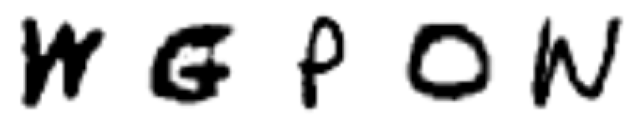

train_resize_linear .shape:  (124800, 64, 64) 



In [6]:
#กำหนด rows กับ cols ก่อนว่าจะดูกี่รูป
row = 1
col = int(input('input cols(number1-10):')) #จะให้ viz กี่คอลัมน์ ไม่เกิน 10
cmap = input('which cmap??: ') #binary, jet

viz_list = [X_train, train_sharp_deck,train_inter_area,train_cubic, train_nearest,train_linear]
viz_name = ['train_orinal', 'train_sharp','train_resize_inter_area','train_resize_cubic','train_resize_nearest','train_resize_linear']

visualize_all(row=row,col=col,cmap=cmap, viz_list=viz_list, viz_name= viz_name)

**<font size=5>Visualize picture after filtering (testing dataset)**


In [ ]:
#กำหนด rows กับ cols ก่อนว่าจะดูกี่รูป
row = 1
col = int(input('input cols(number):')) #จะให้ viz กี่คอลัมน์
cmap = input('which cmap??: ') #binary, jet

viz_list = [ X_test, test_sharp_deck, test_inter_area,test_cubic,test_nearest,test_linear]
viz_name = [ 'test_orinal', 'test_sharp','test_resize_inter_area,','test_resize_cubic','test_resize_nearest','test_resize_linear']

visualize_all(row=row,col=col,cmap=cmap, viz_list=viz_list, viz_name= viz_name)

**<font size=5>Check and Prepare data to train model**

In [7]:
#set labels to one-hot
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train_y_labels = label_as_binary.fit_transform(training_labels)
test_y_labels = label_as_binary.fit_transform(test_labels)

In [8]:
# as picture visualization, I chose resize by interpolation=cv2.INTER_CUBIC

x_train_deck = np.stack((train_cubic,)*3, axis=-1)
print('train_deck:',x_train_deck.shape)


x_test_deck= np.stack((test_cubic,)*3, axis=-1)
print('test_deck:',x_test_deck.shape)


#Data Augmentation
gen = ImageDataGenerator(rotation_range=12,
                        width_shift_range=0.1,
                        shear_range=0.3,
                        height_shift_range=0.1,
                        zoom_range=0.1,
                        data_format='channels_first')

#flow เข้า model ตรงนี้ ถ้าจะเอาไป train
batch_size = 256
train_batches = gen.flow(x_train_deck, train_y_labels, batch_size=batch_size)
test_batches = gen.flow(x_test_deck, test_y_labels, batch_size=batch_size)

steps_per_epoch = int(np.ceil(train_batches.n/batch_size))
validation_steps = int(np.ceil(test_batches.n/batch_size))

train_deck: (124800, 64, 64, 3)
test_deck: (20800, 64, 64, 3)


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (124800, 64, 64, 3) (64 channels).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (20800, 64, 64, 3) (64 channels).
  warnings.warn(


<h1> training </h1>

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
#set seed (gor from https://stackoverflow.com/questions/32419510/how-to-get-reproducible-results-in-keras)
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions:
# tf.compat.v1.set_random_seed(seed_value)

In [12]:
input_layer=layers.Input(shape=(64,64,3))
base_model = VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

x = base_model.output
#x = GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
#x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
preds = Dense(26, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [13]:
# setting which layer can be trained
for layer in model.layers[:20]: #VGG16 layer
    layer.trainable = False
for layer in model.layers[20:]:
    layer.trainable = True

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(train_batches, steps_per_epoch= steps_per_epoch, epochs=10)

Epoch 1/10
488/488 [==============================] - 578s 1s/step - loss: 0.8287 - accuracy: 0.7771
Epoch 2/10
488/488 [==============================] - 586s 1s/step - loss: 0.3586 - accuracy: 0.8850
Epoch 3/10
488/488 [==============================] - 578s 1s/step - loss: 0.3045 - accuracy: 0.8992
Epoch 4/10
488/488 [==============================] - 579s 1s/step - loss: 0.2753 - accuracy: 0.9080
Epoch 5/10
488/488 [==============================] - 576s 1s/step - loss: 0.2552 - accuracy: 0.9140
Epoch 6/10
488/488 [==============================] - 579s 1s/step - loss: 0.2427 - accuracy: 0.9170
Epoch 7/10
488/488 [==============================] - 581s 1s/step - loss: 0.2278 - accuracy: 0.9214
Epoch 8/10
488/488 [==============================] - 585s 1s/step - loss: 0.2248 - accuracy: 0.9227
Epoch 9/10
488/488 [==============================] - 581s 1s/step - loss: 0.2129 - accuracy: 0.9263
Epoch 10/10
488/488 [==============================] - 577s 1s/step - loss: 0.2071 - accura

In [16]:
model.save('model_vgg16_text.h5')

In [17]:
score = model.evaluate(test_batches)

82/82 [==============================] - 96s 1s/step - loss: 0.2913 - accuracy: 0.9081
